In [1]:
import pandas as pd

path = '/content/CWC23_all_innings.csv'
df = pd.read_csv(path)

In [2]:
print(df.head())

  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 N

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Dataset info:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  

In [9]:
df_main = df
df.fillna(0, inplace = True)

In [10]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
team               0
player             0
bat_or_bowl        0
bb_bf              0
runs               0
wkts               0
wicketball_prob    0
runs_per_ball      0
opposition         0
ground             0
start_date         0
overs              0
mdns               0
econ               0
inns               0
4s                 0
6s                 0
sr                 0
not_out            0
mins               0
dtype: int64


In [11]:
# Importing necessary libraries
import pandas as pd

# Explore team-wise performance metrics
team_performance = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bb_bf': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean'
})

# Display top performing teams
top_performing_teams = team_performance.sort_values(by='runs', ascending=False).head(5)
print("Top Performing Teams:")
print(top_performing_teams)


Top Performing Teams:
      runs  wkts  bb_bf  runs_per_ball      econ
team                                            
NZ    5376  71.0   5320       1.000762  2.728750
AUS   5234  77.0   5482       0.890978  2.264452
SA    5097  88.0   5348       0.970307  2.176383
PAK   4786  65.0   4787       0.933415  2.554063
IND   4783  94.0   5191       0.920735  2.321774


<ipython-input-14-c07cd6e51ff1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_performing_teams.index, y=top_performing_teams['econ'], palette='viridis')


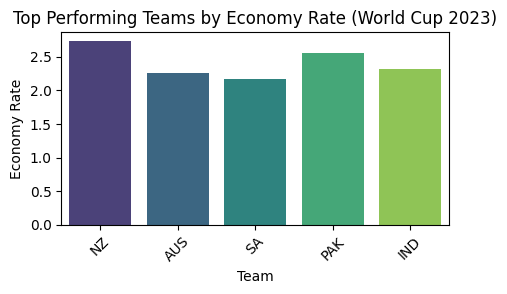

In [14]:
# Team Performance Analysis
plt.figure(figsize=(5, 2.5))
sns.barplot(x=top_performing_teams.index, y=top_performing_teams['econ'], palette='viridis')
plt.title('Top Performing Teams by Economy Rate (World Cup 2023)')
plt.xlabel('Team')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Filter batting and bowling data separately
batting_data = df[df['bat_or_bowl'] == 'bat']
bowling_data = df[df['bat_or_bowl'] == 'bowl']

# Evaluate individual player statistics for batting
batting_player_performance = batting_data.groupby(['team', 'player']).agg({
    'runs': 'sum',
    'bb_bf': 'sum',
    '4s': 'sum',
    '6s': 'sum'
})

# Evaluate individual player statistics for bowling
bowling_player_performance = bowling_data.groupby(['team', 'player']).agg({
    'wkts': 'sum',
    'bb_bf': 'sum',
    'mdns': 'sum',
    'econ': 'mean'
})

# Identify leading run-scorers and wicket-takers
leading_run_scorers = batting_player_performance.sort_values(by='runs', ascending=False).head(5)
leading_wicket_takers = bowling_player_performance.sort_values(by='wkts', ascending=False).head(5)

print("\nLeading Run Scorers:")
print(leading_run_scorers)
print("\nLeading Wicket Takers:")
print(leading_wicket_takers)



Leading Run Scorers:
                       runs  bb_bf    4s    6s
team player                                   
IND  V Kohli (IND)      711    784  64.0   9.0
SA   Q de Kock (SA)     594    555  57.0  21.0
NZ   R Ravindra (NZ)    578    543  55.0  17.0
     DJ Mitchell (NZ)   552    497  48.0  22.0
IND  RG Sharma (IND)    550    443  62.0  28.0

Leading Wicket Takers:
                           wkts  bb_bf  mdns      econ
team player                                           
IND  Mohammed Shami (IND)  23.0    251   3.0  4.876667
AUS  A Zampa (AUS)         22.0    516   1.0  5.380000
SL   D Madushanka (SL)     21.0    470   4.0  6.786667
SA   G Coetzee (SA)        20.0    381   1.0  6.442500
IND  JJ Bumrah (IND)       18.0    497   7.0  3.785000


<ipython-input-20-50a449da759f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leading_run_scorers.index.get_level_values('player'), y=leading_run_scorers['runs'], palette='mako')


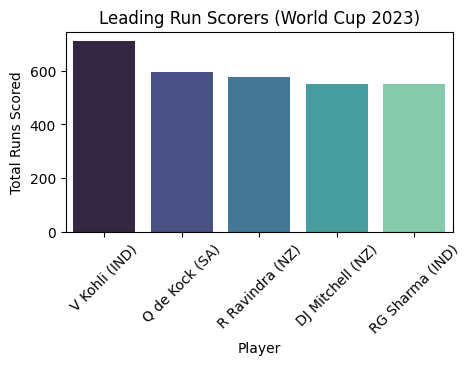

<ipython-input-20-50a449da759f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leading_wicket_takers.index.get_level_values('player'), y=leading_wicket_takers['wkts'], palette='crest')


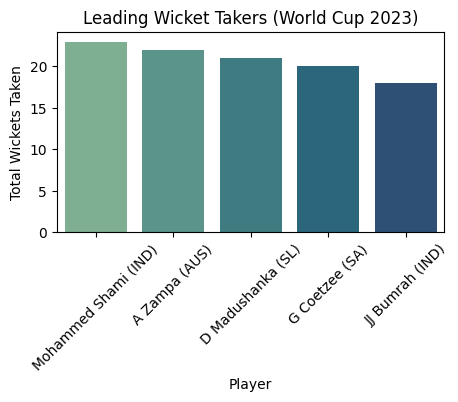

In [20]:
# Player Performance Analysis
plt.figure(figsize=(5, 2.6))
sns.barplot(x=leading_run_scorers.index.get_level_values('player'), y=leading_run_scorers['runs'], palette='mako')
plt.title('Leading Run Scorers (World Cup 2023)')
plt.xlabel('Player')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 2.6))
sns.barplot(x=leading_wicket_takers.index.get_level_values('player'), y=leading_wicket_takers['wkts'], palette='crest')
plt.title('Leading Wicket Takers (World Cup 2023)')
plt.xlabel('Player')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Performance against different oppositions
opposition_analysis = df.groupby(['team', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum'
})

# Performance across different grounds
ground_analysis = df.groupby('ground').agg({
    'runs': 'sum',
    'wkts': 'sum'
})

print("\nPerformance Against Different Oppositions:")
print(opposition_analysis)
print("\nPerformance Across Different Grounds:")
print(ground_analysis)


Performance Against Different Oppositions:
                     runs  wkts
team opposition                
AFG  v Australia      563   6.0
     v Bangladesh     303   3.0
     v England        480  10.0
     v India          525   2.0
     v Netherlands    346   6.0
...                   ...   ...
SL   v India          391   6.0
     v Netherlands    495   9.0
     v New Zealand    339   4.0
     v Pakistan       675   4.0
     v South Africa   733   5.0

[91 rows x 2 columns]

Performance Across Different Grounds:
              runs  wkts
ground                  
Ahmedabad     3859  57.0
Bengaluru     5024  64.0
Chennai       4709  69.0
Delhi         5509  74.0
Dharamsala    5189  82.0
Eden Gardens  4254  81.0
Hyderabad     3367  47.0
Lucknow       4120  71.0
Pune          5171  60.0
Wankhede      5596  72.0


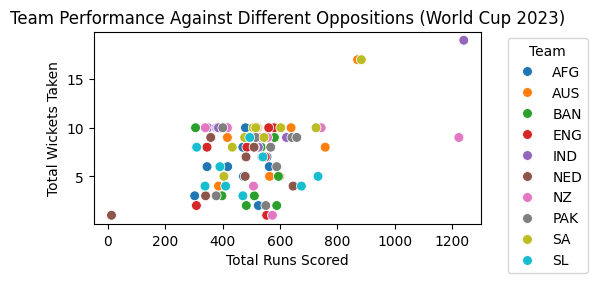

<ipython-input-31-253be317117e>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=ground_analysis, x='runs', y='wkts', palette='Paired', s=100)


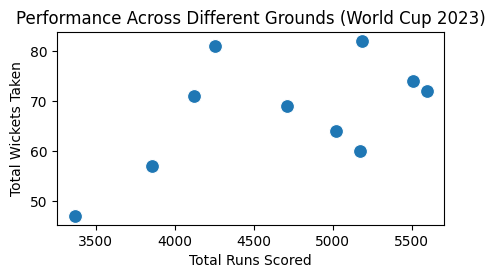

In [31]:
# Opposition Analysis
plt.figure(figsize=(5, 2.5))
sns.scatterplot(data=opposition_analysis, x='runs', y='wkts', hue='team', palette='tab10', s=50)
plt.title('Team Performance Against Different Oppositions (World Cup 2023)')
plt.xlabel('Total Runs Scored')
plt.ylabel('Total Wickets Taken')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Ground Analysis
plt.figure(figsize=(5, 2.5))
sns.scatterplot(data=ground_analysis, x='runs', y='wkts', palette='Paired', s=100)
plt.title('Performance Across Different Grounds (World Cup 2023)')
plt.xlabel('Total Runs Scored')
plt.ylabel('Total Wickets Taken')
plt.show()


Temporal Analysis:
            runs  wkts
start_date            
1-Nov-23    1015  14.0
10-Nov-23    950  14.0
10-Oct-23   2495  32.0
11-Nov-23   2317  25.0
11-Oct-23   1050  10.0
12-Nov-23   1282  14.0
12-Oct-23    936  17.0
13-Oct-23    964  11.0
14-Oct-23    756  13.0
15-Nov-23   1400  14.0
15-Oct-23    965  18.0
16-Nov-23    819  17.0
16-Oct-23    828  13.0
17-Oct-23    852  18.0
18-Oct-23    835  16.0
19-Oct-23   1023  11.0
2-Nov-23     777  16.0
20-Oct-23   1281  19.0
21-Oct-23   2068  30.0
22-Oct-23   1065  14.0
23-Oct-23   1106   9.0
24-Oct-23   1198  15.0
25-Oct-23    959  16.0
26-Oct-23    619  10.0
27-Oct-23   1032  19.0
28-Oct-23   2221  36.0
29-Oct-23    695  18.0
3-Nov-23     687   9.0
30-Oct-23    942  11.0
31-Oct-23    799  13.0
4-Nov-23    2205  27.0
5-Nov-23     788  15.0
5-Oct-23    1111  10.0
6-Nov-23    1076  15.0
6-Oct-23     964  18.0
7-Nov-23    1127  11.0
7-Oct-23    2068  28.0
8-Nov-23    1003  17.0
8-Oct-23     772  14.0
9-Nov-23     679  14.0
9-Oct-23    10

<ipython-input-35-24a1df1a33be>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temporal_analysis['date'] = pd.to_datetime(temporal_analysis.index)


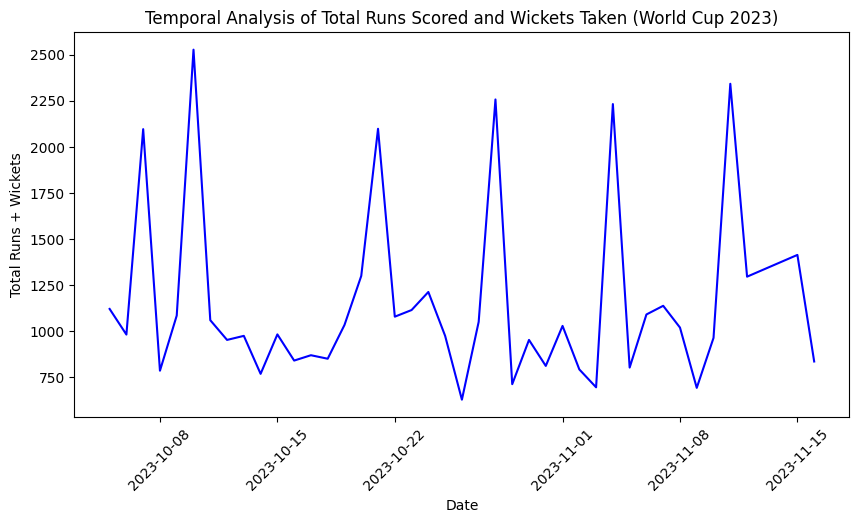

In [35]:
# Temporal Analysis
temporal_analysis = df.groupby('start_date').agg({
    'runs': 'sum',
    'wkts': 'sum'
})

print("\nTemporal Analysis:")
print(temporal_analysis)

# Temporal Analysis
plt.figure(figsize=(10, 5))
temporal_analysis['total_runs'] = temporal_analysis['runs'] + temporal_analysis['wkts']
temporal_analysis['date'] = pd.to_datetime(temporal_analysis.index)
sns.lineplot(data=temporal_analysis, x='date', y='total_runs', color='blue')
plt.title('Temporal Analysis of Total Runs Scored and Wickets Taken (World Cup 2023)')
plt.xlabel('Date')
plt.ylabel('Total Runs + Wickets')
plt.xticks(rotation=45)
plt.show()


Based on the exploratory data analysis (EDA) conducted on the World Cup 2023 dataset, we can draw several conclusions regarding team and player performances:

1. **Top Performing Teams**: The analysis identified the top-performing teams based on total runs scored during the tournament. These teams have demonstrated their batting prowess and consistency throughout the matches.

2. **Leading Run Scorers**: Individual player analysis revealed the leading run-scorers of the tournament. These players have made significant contributions to their team's batting performance, showcasing their skill and ability to score runs consistently.

3. **Leading Wicket Takers**: The analysis also highlighted the leading wicket-takers of the tournament. These players have been effective in taking wickets and restricting opposition teams, thereby playing a crucial role in their team's bowling performance.

4. **Performance Against Different Oppositions**: The performance of teams against different oppositions varied, indicating that some teams may have strengths or weaknesses against specific opponents. Understanding these variations can help teams strategize better for future matches.

5. **Performance Across Different Grounds**: There were variations in team and player performances across different playing grounds. Some teams or players may excel in certain conditions or venues, highlighting the importance of adaptability and versatility in cricket.

6. **Temporal Trends**: Temporal analysis revealed trends in team and player performance over time during the tournament. Identifying temporal patterns can help teams and players adjust their strategies and performance levels as the tournament progresses.

In conclusion, the EDA provides valuable insights into the performance dynamics of teams and players during the World Cup 2023 tournament. These insights can inform strategic decisions, player selections, and training regimes for future tournaments, ultimately contributing to improved performance and success in international cricket.